In [1]:
import pandas as pd
import missingno as msno
from fuzzywuzzy import fuzz
from unidecode import unidecode

c:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Pipe para receber base consolidada e criar colunas de fuzzy, inclui regras que eliminam dados caso fuzzy tenha score baixo
# [ ] = CNES vs RF (falta CNPJ)
# [ ] = CNES vs Google Places (falta NOME)

In [3]:
df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')

<ipython-input-3-dd13301c0222>:1: DtypeWarning: Columns (92,93,123,153,155,156,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')


CNES vs RF

In [4]:
# Nome Fantasia
df[['Nome Fantasia','fantasia']].info()#muitos nomes fantasias da RF nulos
df['Nome Fantasia'] = df['Nome Fantasia'].astype(str)
df['fantasia'] = df['fantasia'].astype(str)
for index,row in df.iterrows():
    if row['fantasia']:
        df.loc[index, "Fuzzy_Fantasia_CNESvsRF"] =  fuzz.ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        # df.loc[index, "Fuzzy_partial_ratio_Fantasia_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        # df.loc[index, "Fuzzy_token_sort_ratio_Fantasia_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
        # df.loc[index, "Fuzzy_token_set_ratio_Fantasia_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['fantasia'].lower()))
df[['Nome Fantasia','fantasia','Fuzzy_Fantasia_CNESvsRF']][df['fantasia']!='nan'].sort_values(by='Fuzzy_Fantasia_CNESvsRF',ascending=False)#,"Fuzzy_partial_ratio_Fantasia_CNESvsRF","Fuzzy_token_sort_ratio_Fantasia_CNESvsRF","Fuzzy_token_set_ratio_Fantasia_CNESvsRF"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nome Fantasia  21053 non-null  object
 1   fantasia       13688 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


,Nome Fantasia,fantasia,Fuzzy_Fantasia_CNESvsRF
0,CENTRAL IMAGEM CLINICA MEDICA,CENTRAL IMAGEM CLINICA MEDICA,100.0
12374,ASSOCIACAO PESTALOZZI DE CUIABA,ASSOCIACAO PESTALOZZI DE CUIABA,100.0
12343,PSICODONTO,PSICODONTO,100.0
12349,CLINICA CORTEZ,CLINICA CORTEZ,100.0
12353,VITACLIN INTERAGINDO,VITACLIN INTERAGINDO,100.0
...,...,...,...
3283,VIDA ITU,#NOME?,0.0
3270,PRONEFRON,DAVITA,0.0
13273,CISA,PROPREV,0.0
19073,S E R TAUBATE,.,0.0


<AxesSubplot:>

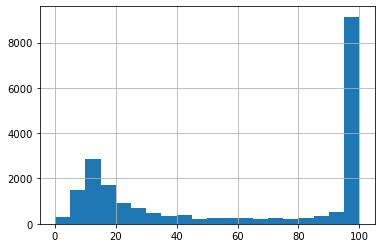

In [5]:
df['Fuzzy_Fantasia_CNESvsRF'].hist(bins=20)

In [6]:
#Razão Social
df[['Razão Social','nome:1']].info()
df['Razão Social'] = df['Razão Social'].astype(str)
df['nome:1'] = df['nome:1'].astype(str)
for index,row in df.iterrows():
    if row['nome:1']:
        df.loc[index, "Fuzzy_Razão_CNESvsRF"] =  fuzz.ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Razão_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Razão_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Razão_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Razão Social'].lower()),unidecode(row['nome:1'].lower()))
# df[['Razão Social','nome:1','Fuzzy_Razão_CNESvsRF',"Fuzzy_partial_ratio_Razão_CNESvsRF","Fuzzy_token_sort_ratio_Razão_CNESvsRF","Fuzzy_token_set_ratio_Razão_CNESvsRF"]][df['nome:1']!='nan'].sort_values(by='Fuzzy_Razão_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Razão Social  21053 non-null  object
 1   nome:1        21052 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


<AxesSubplot:>

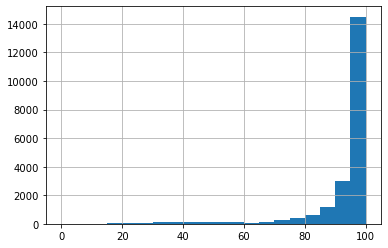

In [7]:
df["Fuzzy_Razão_CNESvsRF"].hist(bins=20)

In [8]:
#Logradouro
df[['Logradouro','logradouro']].info()
df['Logradouro'] = df['Logradouro'].astype(str)
df['logradouro'] = df['logradouro'].astype(str)
for index,row in df.iterrows():
    if row['logradouro']:
        df.loc[index, "Fuzzy_Logradouro_CNESvsRF"] =  fuzz.ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Logradouro_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Logradouro_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Logradouro_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Logradouro'].lower()),unidecode(row['logradouro'].lower()))
# df[['Logradouro','logradouro','Fuzzy_Logradouro_CNESvsRF',"Fuzzy_partial_ratio_Logradouro_CNESvsRF","Fuzzy_token_sort_ratio_Logradouro_CNESvsRF","Fuzzy_token_set_ratio_Logradouro_CNESvsRF"]][df['logradouro']!='nan'].sort_values(by='Fuzzy_Logradouro_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Logradouro  21053 non-null  object
 1   logradouro  19095 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


<AxesSubplot:>

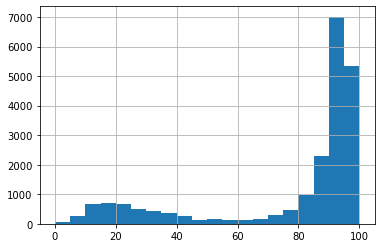

In [9]:
df["Fuzzy_Logradouro_CNESvsRF"].hist(bins=20)

In [10]:
#Numero do endereço
df[['Número do endereço','numero']].info()
df['Número do endereço'] = df['Número do endereço'].astype(str)
df['numero'] = df['numero'].astype(str)
for index,row in df.iterrows():
    if row['numero']:
        df.loc[index, "Fuzzy_Número_CNESvsRF"] =  fuzz.ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Número_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Número_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Número_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Número do endereço'].lower()),unidecode(row['numero'].lower()))
# df[['Número do endereço','numero','Fuzzy_Número_CNESvsRF',"Fuzzy_partial_ratio_Número_CNESvsRF","Fuzzy_token_sort_ratio_Número_CNESvsRF","Fuzzy_token_set_ratio_Número_CNESvsRF"]][df['numero']!='nan'].sort_values(by='Fuzzy_Número_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Número do endereço  21049 non-null  object
 1   numero              19084 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


<AxesSubplot:>

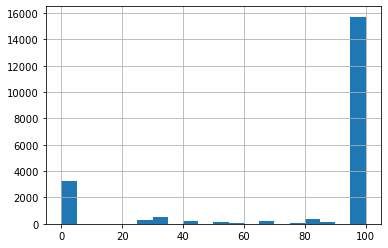

In [11]:
df["Fuzzy_Número_CNESvsRF"].hist(bins=20)

In [12]:
#Município
df[['Município','municipio']].info()
df['Município'] = df['Município'].astype(str)
df['municipio'] = df['municipio'].astype(str)
for index,row in df.iterrows():
    if row['municipio']:
        df.loc[index, "Fuzzy_Município_CNESvsRF"] =  fuzz.ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Município_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Município_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Município_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['Município'].lower()),unidecode(row['municipio'].lower()))
# df[['Município','municipio','Fuzzy_Município_CNESvsRF',"Fuzzy_partial_ratio_Município_CNESvsRF","Fuzzy_token_sort_ratio_Município_CNESvsRF","Fuzzy_token_set_ratio_Município_CNESvsRF"]][df['municipio']!='nan'].sort_values(by='Fuzzy_Município_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  21053 non-null  object
 1   municipio  19094 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


<AxesSubplot:>

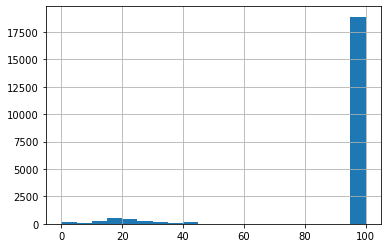

In [13]:
df['Fuzzy_Município_CNESvsRF'].hist(bins=20)

In [14]:
#UF
df[['UF','uf']].info()
df['UF'] = df['UF'].astype(str)
df['uf'] = df['uf'].astype(str)
for index,row in df.iterrows():
    if row['uf']:
        df.loc[index, "Fuzzy_UF_CNESvsRF"] =  fuzz.ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_UF_CNESvsRF"] =  fuzz.partial_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_UF_CNESvsRF"] =  fuzz.token_sort_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_UF_CNESvsRF"] =  fuzz.token_set_ratio(unidecode(row['UF'].lower()),unidecode(row['uf'].lower()))
# df[['UF','uf','Fuzzy_UF_CNESvsRF',"Fuzzy_partial_ratio_UF_CNESvsRF","Fuzzy_token_sort_ratio_UF_CNESvsRF","Fuzzy_token_set_ratio_UF_CNESvsRF"]][df['uf']!='nan'].sort_values(by='Fuzzy_UF_CNESvsRF',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      21053 non-null  object
 1   uf      19094 non-null  object
dtypes: object(2)
memory usage: 329.1+ KB


<AxesSubplot:>

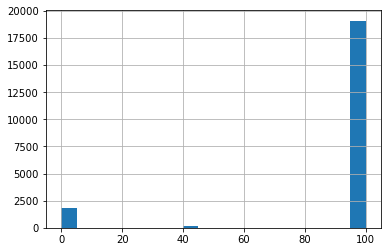

In [15]:
df['Fuzzy_UF_CNESvsRF'].hist(bins=20)

## CNES vs Google Places

In [16]:
# df[['PARAM_NOME','Nome Fantasia','Razão Social']][df['PARAM_NOME'].notnull()].sample(5)
# (df['PARAM_NOME']==df['Nome Fantasia']).value_counts()

In [17]:
df[['Nome Fantasia','gmapsCompanyName']].info()
df['Nome Fantasia'] = df['Nome Fantasia'].astype(str)
df['gmapsCompanyName'] = df['gmapsCompanyName'].astype(str)
for index,row in df.iterrows():
    if row['gmapsCompanyName']:
        df.loc[index, "Fuzzy_Nome_CNESvsGMN"] =  fuzz.ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Nome_CNESvsGMN"] =  fuzz.partial_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Nome_CNESvsGMN"] =  fuzz.token_sort_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Nome_CNESvsGMN"] =  fuzz.token_set_ratio(unidecode(row['Nome Fantasia'].lower()),unidecode(row['gmapsCompanyName'].lower()))
# df[['Nome Fantasia','gmapsCompanyName','Fuzzy_Nome_CNESvsGMN',"Fuzzy_partial_ratio_Nome_CNESvsGMN","Fuzzy_token_sort_ratio_Nome_CNESvsGMN","Fuzzy_token_set_ratio_Nome_CNESvsGMN"]][df['gmapsCompanyName']!='nan'].sort_values(by='Fuzzy_Nome_CNESvsGMN',ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome Fantasia     21053 non-null  object
 1   gmapsCompanyName  265 non-null    object
dtypes: object(2)
memory usage: 329.1+ KB


<AxesSubplot:>

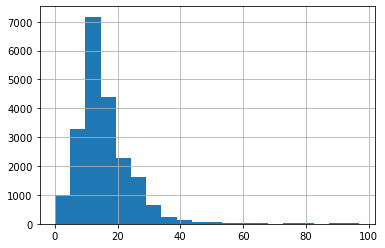

In [18]:
df["Fuzzy_Nome_CNESvsGMN"].hist(bins=20)
# df["Fuzzy_Nome_CNESvsGMN"].value_counts()

In [19]:
# df[['PARAM_NOME','gmapsCompanyName']].info()
# df['PARAM_NOME'] = df['PARAM_NOME'].astype(str)
# df['gmapsCompanyName'] = df['gmapsCompanyName'].astype(str)
# for index,row in df.iterrows():
#     if row['gmapsCompanyName']:
#         df.loc[index, "Fuzzy_Nome_CNESvsGMN"] =  fuzz.ratio(unidecode(row['PARAM_NOME'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_partial_ratio_Nome_CNESvsGMN"] =  fuzz.partial_ratio(unidecode(row['PARAM_NOME'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_token_sort_ratio_Nome_CNESvsGMN"] =  fuzz.token_sort_ratio(unidecode(row['PARAM_NOME'].lower()),unidecode(row['gmapsCompanyName'].lower()))
#         df.loc[index, "Fuzzy_token_set_ratio_Nome_CNESvsGMN"] =  fuzz.token_set_ratio(unidecode(row['PARAM_NOME'].lower()),unidecode(row['gmapsCompanyName'].lower()))
# df[['PARAM_NOME','gmapsCompanyName','Fuzzy_Nome_CNESvsGMN',"Fuzzy_partial_ratio_Nome_CNESvsGMN","Fuzzy_token_sort_ratio_Nome_CNESvsGMN","Fuzzy_token_set_ratio_Nome_CNESvsGMN"]][df['gmapsCompanyName']!='nan'].sort_values(by='Fuzzy_Nome_CNESvsGMN',ascending=False)

In [29]:
teste='Rua Professor Dias da Rocha, 2192 - Dionísio'
teste.split(',')

['Rua Professor Dias da Rocha', ' 2192 - Dionísio']

In [44]:
df['gmapsAddress'][df['gmapsAddress'].notnull()]
df['gmapsStreet'] = df['gmapsAddress'].str.split(',').str[0]
df['gmapsNumber'] = df['gmapsAddress'].str.split(',').str[1].str.split(' - ').str[0]
df[['gmapsStreet','gmapsNumber']][df['gmapsAddress'].notnull()]

,gmapsStreet,gmapsNumber
140,Rua Professor Dias da Rocha,2192
154,R. José Félix de Oliveira,1914
857,Av. T-3,600
1003,Praça da Bandeira,170
1101,R. Princesa Isabel de Bragança,230
...,...,...
20427,R. Gil Veloso,377
20601,Asa Norte Comércio Local Norte 110 BL A QUADRA...,DF
20667,R. 8,2066
20922,Av. do Batel,1868
